In [1]:
import warnings

warnings.filterwarnings("ignore")
import os

if "jbook" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))

# Text Quality Analysis
To fine-tune an Aspect-Based Sentiment Analysis (ABSA) model effectively, we need a high-quality subset of labeled data that captures the nuances of sentiment across various aspects. Since manual labeling is resource-intensive, we’ll leverage pseudolabeling to annotate the data automatically, using a curated set of high-quality samples. 

The purpose of this approach is twofold: first, to ensure the ABSA model is trained on data that accurately reflects diverse sentiment patterns, and second, to enhance the model's ability to generalize across different contexts within the dataset. By prioritizing high-quality samples, we aim to maximize the model's interpretability and accuracy when identifying and analyzing aspect-specific sentiments in real-world applications.


## Import Libraries

In [2]:
from discover.container import DiscoverContainer
from discover.assets.idgen import AssetIDGen
from discover.core.flow import PhaseDef, DataPrepStageDef
from discover.app.tqa import TextQualityAnalysis, DatasetEvaluation
from discover.infra.utils.visual.print import Printer

# Params

In [3]:
PHASE = PhaseDef.DATAPREP
STAGE = DataPrepStageDef.TQA

## Dependency Container

In [4]:
container = DiscoverContainer()
container.init_resources()
container.wire(
    modules=[
        "discover.flow.data_prep.stage",
    ],
)

## Data Loading

In [5]:
# Get the assert id
idgen = AssetIDGen()
asset_id = idgen.get_asset_id(
    asset_type="dataset", phase=PHASE, stage=STAGE, name="review"
)
# Instantiate the repository
repo = container.repo.dataset_repo()
# Load the dataset from the repository
df = repo.get(asset_id, distributed=False).content
# Instantiate the Review object for analysis.

## Distribution of Text Quality Scores

## Sample from Most 

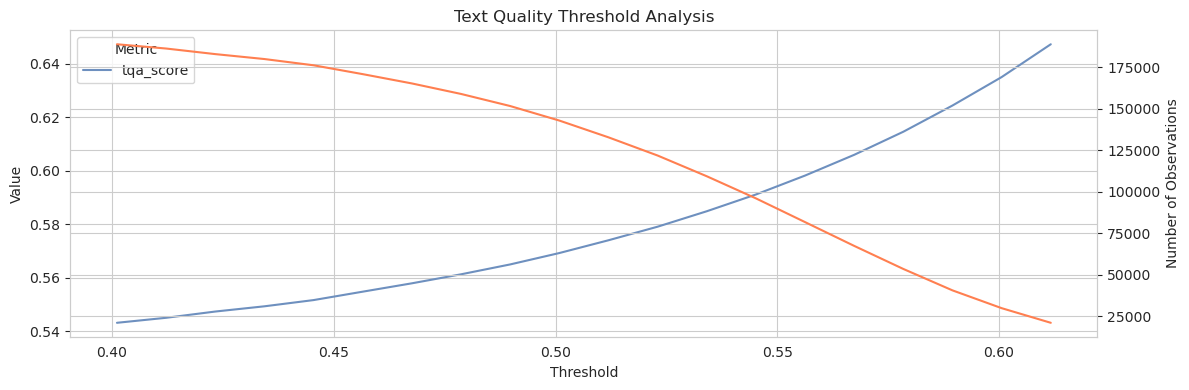

In [6]:
tqa = TextQualityAnalysis(df=df)
tqa.plot_thresholds(metrics=["tqa_score"])

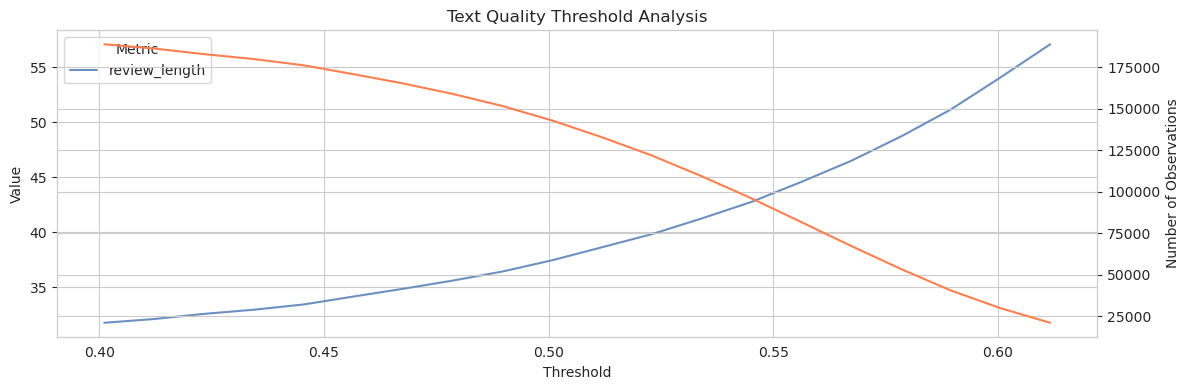

In [7]:
tqa.plot_thresholds(metrics=["eda_review_length"])

## Dataset Evaluation at Thresholds

In [8]:
de = DatasetEvaluation(df=df)
# de.histogram(column="rating")

In [9]:
# de.histogram(column="rating", cumulative=True)

In [10]:
# de.kstest(column="rating")

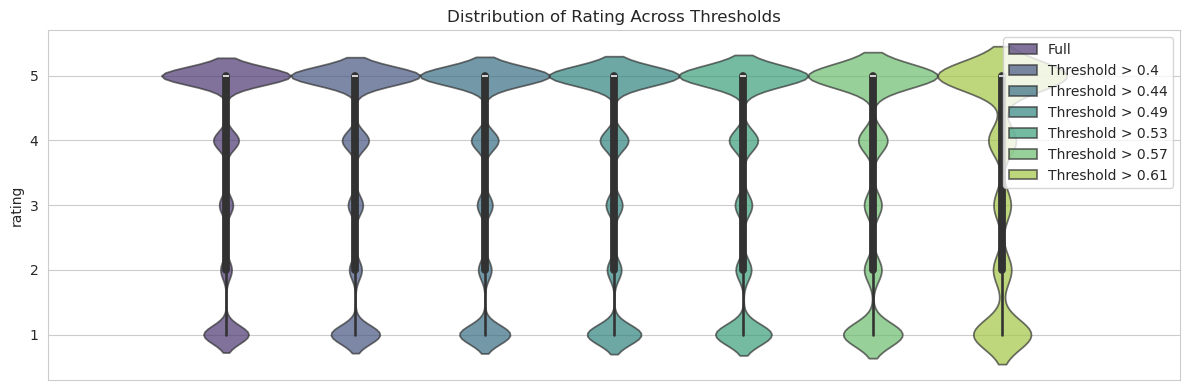

In [11]:
de.violin(column="rating")